# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# 1. INTRODUCTION
Abalone (ab-ah-LOW-nee) is a large marine gastropod mollusk. The large sea snail is most often found in the cold waters of New Zealand, Australia, South Africa, Japan, and the west coast of North America. It has extremely rich,flavorful, and highly prized meat that is considered a culinary delicacy.Abalone is an excellent source of iron and pantothenic acid, is a nutritious food
resource and farming in many parts of the world. 100 grams of abalone yields more than 20%
recommended daily intake of these nutrients. Abalones have long been a valuable food source
for humans in every area of the world where a species is abundant. The meat of this mollusc is
considered a delicacy in certain parts of Latin America (especially Chile), France, New Zealand,
Southeast Asia, and East Asia (especially in China, Vietnam, Japan, and Korea). Abalone pearl
jewelry is very popular in New Zealand and Australia, in no minor part due to the marketing and
farming efforts of pearl companies.The economic value of abalone is positively correlated with its age. Therefore, to detect the age of abalone accurately is important for both farmers and customers to determine its price. Getting
access to the rings of an abalone involves cutting the shell. After polishing and staining, a lab
technician examines a shell sample under a microscope and counts the rings. Because some rings
are hard to make out using this method, the researchers believed adding 1.5 to the ring count is a
reasonable approximation of the abalones age.This complex method increases the cost and limits
its popularity.  Our target is to find out the best indicators to forecast the rings, then the age of abalones.


![my image caption](abalone.jpg)

## Import Libraries

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
install.packages('corrplot')
suppressPackageStartupMessages(library(corrplot))
install.packages('moments')
suppressPackageStartupMessages(library(moments))
install.packages('GGally')
suppressPackageStartupMessages(library(GGally))
install.packages('faraway')
suppressPackageStartupMessages(library(faraway))
install.packages('olsrr')
suppressPackageStartupMessages(library(olsrr))
install.packages('lmtest')
suppressPackageStartupMessages(library(MASS))
install.packages('MASS')
install.packages('ggfortify')
suppressPackageStartupMessages(library(ggfortify))
install.packages('broom')
suppressPackageStartupMessages(library(broom))
install.packages('jtools')
install.packages('huxtable')
suppressPackageStartupMessages(library(huxtable))
suppressPackageStartupMessages(library(jtools))
install.packages('cowplot')
suppressPackageStartupMessages(library(cowplot))






Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/corrplot_0.92.tar.gz' ...
	OK [downloaded 3.7 Mb in 0.1 secs]
Installing corrplot [0.92] ...
	OK [installed binary]
Moving corrplot [0.92] into the cache ...
	OK [moved to cache in 0.42 milliseconds]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/moments_0.14.1.tar.gz' ...
	OK [downloaded 52.9 Kb in 0.1 secs]
Installing moments [0.14.1] ...
	OK [installed binary]
Moving moments [0.14.1] into the cache ...
	OK [moved to cache in 0.33 milliseconds]
Installing GGally [2.1.2] ...
	OK [linked cache]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/faraway_1.0.8.tar.gz' ...
	OK [downloaded 750.9 Kb in 0.2 secs]
Installing faraway [1.0.8] ...
	OK [installed binary]
Moving faraway [1.0.8] into the cache ...
	OK [moved to cache in 0.38 milliseconds]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/o

# 2 DATA PREPARATION
## 2.1 Feature data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

## 2.2 Read data

In [2]:
abalone <- readr::read_csv('data/abalone.csv', show_col_types = FALSE)


## 2.3 INSPECTING THE DATA

### 2.3.1 Types of variables

In [3]:
head(abalone)
str(abalone)
dim(abalone)


sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


spec_tbl_df [4,177 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ sex       : chr [1:4177] "M" "M" "F" "M" ...
 $ length    : num [1:4177] 0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ diameter  : num [1:4177] 0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ height    : num [1:4177] 0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ whole_wt  : num [1:4177] 0.514 0.226 0.677 0.516 0.205 ...
 $ shucked_wt: num [1:4177] 0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ viscera_wt: num [1:4177] 0.101 0.0485 0.1415 0.114 0.0395 ...
 $ shell_wt  : num [1:4177] 0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ rings     : num [1:4177] 15 7 9 10 7 8 20 16 9 19 ...
 $ age       : num [1:4177] 16.5 8.5 10.5 11.5 8.5 9.5 21.5 17.5 10.5 20.5 ...
 - attr(*, "spec")=
  .. cols(
  ..   sex = col_character(),
  ..   length = col_double(),
  ..   diameter = col_double(),
  ..   height = col_double(),
  ..   whole_wt = col_double(),
  ..   shucked_wt = col_do

[1] 4177   10

*There are 4177 entries with 1 column of character and 9 columns of numeric type*
- As seen sex is assigned as chracter type which needs transformed to factor type. 

In [4]:
##Convering sex variable to factor type
abalone$sex = as.factor(abalone$sex)
glimpse(abalone)

Rows: 4,177
Columns: 10
$ sex        <fct> M, M, F, M, I, I, F, F, M, F, F, M, M, F, F, M, I, F, M, M,…
$ length     <dbl> 0.455, 0.350, 0.530, 0.440, 0.330, 0.425, 0.530, 0.545, 0.4…
$ diameter   <dbl> 0.365, 0.265, 0.420, 0.365, 0.255, 0.300, 0.415, 0.425, 0.3…
$ height     <dbl> 0.095, 0.090, 0.135, 0.125, 0.080, 0.095, 0.150, 0.125, 0.1…
$ whole_wt   <dbl> 0.5140, 0.2255, 0.6770, 0.5160, 0.2050, 0.3515, 0.7775, 0.7…
$ shucked_wt <dbl> 0.2245, 0.0995, 0.2565, 0.2155, 0.0895, 0.1410, 0.2370, 0.2…
$ viscera_wt <dbl> 0.1010, 0.0485, 0.1415, 0.1140, 0.0395, 0.0775, 0.1415, 0.1…
$ shell_wt   <dbl> 0.150, 0.070, 0.210, 0.155, 0.055, 0.120, 0.330, 0.260, 0.1…
$ rings      <dbl> 15, 7, 9, 10, 7, 8, 20, 16, 9, 19, 14, 10, 11, 10, 10, 12, …
$ age        <dbl> 16.5, 8.5, 10.5, 11.5, 8.5, 9.5, 21.5, 17.5, 10.5, 20.5, 15…


## 2.4 DESCRIPTIVE ANALYSIS

### 2.4.1 Analysing Distribution of Data 

In [5]:
summary(abalone)
# seperating categorical variable
abl_cat =abalone %>% 
dplyr::select(sex)  %>% 
 group_by(sex)


#analysing proportion of data on the basis of sex
sex_prop =abl_cat %>%
summarise(count_n=n())%>%
mutate(prop.= paste0(round(count_n/sum(count_n)*100 , 2) , "%" ))
print(sex_prop)



 sex          length         diameter          height          whole_wt     
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
   shucked_wt       viscera_wt        shell_wt          rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

# A tibble: 3 × 3
  sex   count_n prop. 
  <fct>   <int> <chr> 
1 F        1307 31.29%
2 I        1342 32.13%
3 M        1528 36.58%


In [6]:
# This is a chart, switch to the DataCamp editor to view and configure it.

sex,count_n,prop.
<fct>,<int>,<chr>
F,1307,31.29%
I,1342,32.13%
M,1528,36.58%


- Looking at the dataset summary, we can see that data is quite evenly distributed between the three factor levels of male, female and infant.
- The minimum height of abalone is given as 0 which practically is not possible , we will investigate these observation to look closely.

### 2.4.2 Checking NAs and omitted variables

In [7]:

missing_data= function(x) {
    name_var= c()
    missing_values = c()
    for (i in 1: x ){
     name_var[i]=(names(abalone[i]))
     missing_values[i] =(sum(is.na(abalone[i])))
     }
  return(data.frame(name_var, missing_values ))
    
}

as.data.frame(lapply((ncol(abalone)) , missing_data))



name_var,missing_values
<chr>,<int>
sex,0
length,0
diameter,0
height,0
whole_wt,0
shucked_wt,0
viscera_wt,0
shell_wt,0
rings,0


*Perfect! We find No NA's in the dataset.*

### 2.4.3 Checking for duplicates 

In [8]:
dup_data= sum(duplicated(abalone))
paste0("There are " ,dup_data , " " , "full duplicates in the dataset")

[1] "There are 0 full duplicates in the dataset"

*No full duplicates*

### 2.4.4 Check for Outliers

Warning message in stack.data.frame(abalone):
“non-vector columns will be ignored”


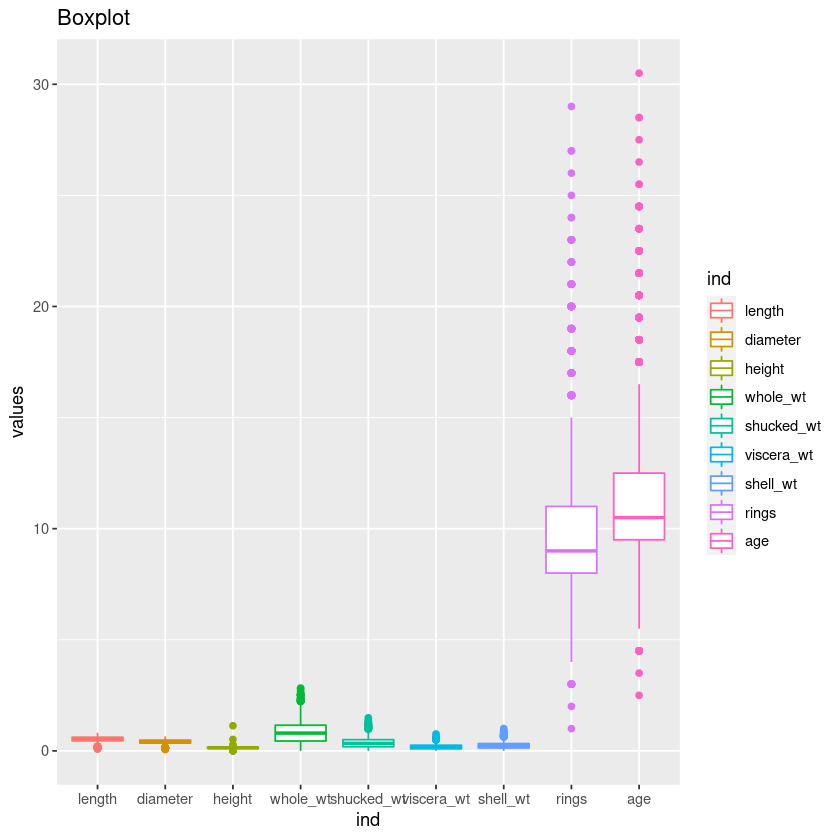

In [9]:
ggplot(stack(abalone), aes(x = ind, y = values , color= ind) )+
  geom_boxplot()+
  labs(title ="Boxplot")




- We can see the dataset is incosistent with many outliers especially in rings and age variable which can lead to biased results and hence needs to be rescaled. But before removing potential outliers is essential to visualise the distribition of variable for each feature in order to get the gist of skewness and noramlality of data. 

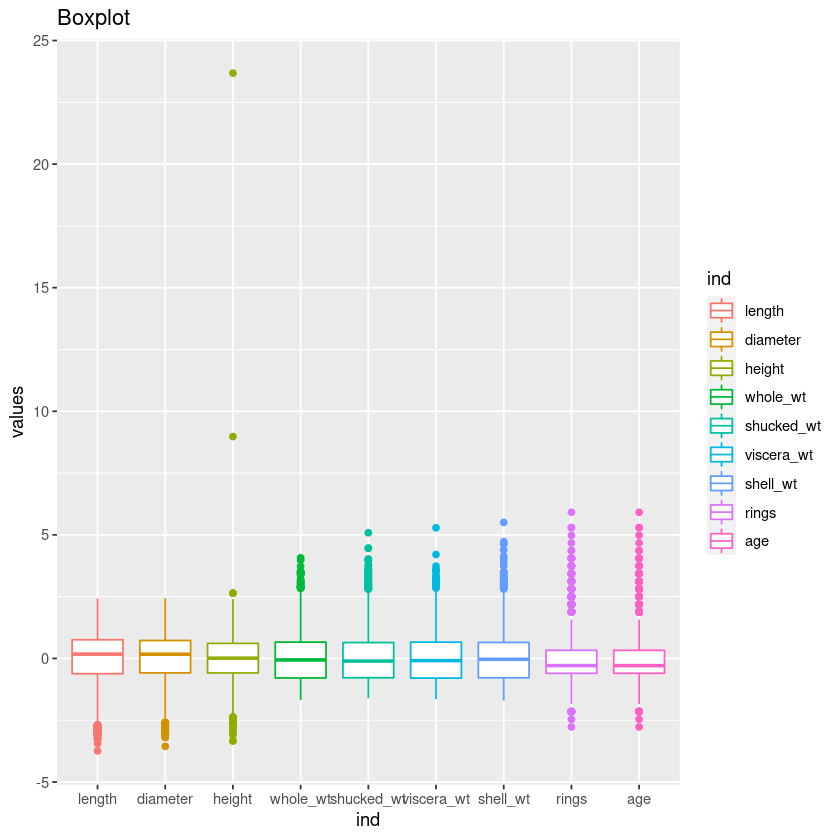

In [10]:
##standarization of data.
std_num_abl= function(y) {
    
    standarization =(y - mean(y)) / sd(y)
    return(standarization)
}

abl_num=as.data.frame(lapply(abalone[, -1],std_num_abl ))
ggplot(stack(abl_num), aes(x = ind, y = values , color= ind) )+
  geom_boxplot()+
  labs(title ="Boxplot")




- After standarisation the picture is much more clear ,It can be seen that major outliers are from height variable which can effect our model prediction and also rings ans age.

>Lets check the how the outliers effects the normality by the measure of skewness kurtosis and viariation

In [11]:
abl_sum=as.data.frame(sapply(abalone[,-1], summary))
abl_sum
abl_skew = as.data.frame(sapply (abalone[,-1], skewness))
abl_kur = as.data.frame (sapply(abalone[,-1], kurtosis))
abl_var = as.data.frame(sapply(abalone[,-1] , var))

as.data.frame(cbind(var = abl_var, skew= abl_skew , abl_kur))



,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min.,0.0750000,0.0550000,0.0000000,0.0020000,0.0010000,0.0005000,0.0015000,1.000000,2.50000
1st Qu.,0.4500000,0.3500000,0.1150000,0.4415000,0.1860000,0.0935000,0.1300000,8.000000,9.50000
Median,0.5450000,0.4250000,0.1400000,0.7995000,0.3360000,0.1710000,0.2340000,9.000000,10.50000
Mean,0.5239921,0.4078813,0.1395164,0.8287422,0.3593675,0.1805936,0.2388309,9.933684,11.43368
3rd Qu.,0.6150000,0.4800000,0.1650000,1.1530000,0.5020000,0.2530000,0.3290000,11.000000,12.50000
Max.,0.8150000,0.6500000,1.1300000,2.8255000,1.4880000,0.7600000,1.0050000,29.000000,30.50000


,"sapply(abalone[, -1], var)","sapply(abalone[, -1], skewness)","sapply(abalone[, -1], kurtosis)"
,<dbl>,<dbl>,<dbl>
length,0.014422308,-0.6396435,3.063108
diameter,0.009848551,-0.6089794,2.953143
height,0.001749503,3.1276937,78.933099
whole_wt,0.240481389,0.5307679,2.974949
shucked_wt,0.049267551,0.7188397,3.592975
viscera_wt,0.012015284,0.5916396,3.082475
shell_wt,0.019377383,0.6207038,3.529854
rings,10.395265947,1.1137018,5.326462
age,10.395265947,1.1137018,5.326462


In [12]:
#REMOVING OUTLIER 
abl_numerical = as.data.frame(abalone[,-1])

v= list()

abl_outliers=for (i in 1:ncol(abl_num)){
    
     name_out= (names(abl_numerical))[i]
    abliout = boxplot.stats(abl_numerical[,i])$out
    v[[(names(abl_numerical))[i]]]=  boxplot.stats(abl_numerical[,i])$out
    len_out = length(abliout)
    print(c(name_out ,paste("number of outliers" , len_out)))
    print(sort(abliout))

}



abl_num_noout= abalone %>% filter( !length  %in% v$length , !diameter  %in% v$diameter ,!height  %in% v$height ,
                         !whole_wt %in% v$whole_wt , !shell_wt %in% v$shell_wt ,!shucked_wt %in% v$shucked_wt ,
                         !viscera_wt %in% v$viscera_wt, !rings %in% v$rings)


head(abl_num_noout)

paste("Total no of rows with outliers removed" ,dim(abl_numerical)[1]-dim(abl_num_noout)[1] , "hence dimension of cleaned dataset ", dim(abl_num_noout)[1] ,"x", dim(abl_num_noout)[2])



[1] "length"                "number of outliers 49"
 [1] 0.075 0.110 0.130 0.130 0.135 0.140 0.140 0.150 0.155 0.155 0.155 0.160
[13] 0.160 0.160 0.160 0.165 0.165 0.165 0.165 0.165 0.170 0.170 0.170 0.175
[25] 0.175 0.175 0.175 0.175 0.180 0.180 0.180 0.180 0.185 0.185 0.185 0.185
[37] 0.190 0.190 0.190 0.190 0.195 0.195 0.195 0.200 0.200 0.200 0.200 0.200
[49] 0.200
[1] "diameter"              "number of outliers 59"
 [1] 0.055 0.090 0.095 0.100 0.100 0.105 0.105 0.105 0.105 0.110 0.110 0.110
[13] 0.110 0.115 0.115 0.120 0.120 0.120 0.120 0.120 0.125 0.125 0.125 0.125
[25] 0.125 0.125 0.125 0.130 0.130 0.130 0.130 0.130 0.130 0.130 0.130 0.135
[37] 0.135 0.135 0.135 0.135 0.140 0.140 0.140 0.145 0.145 0.145 0.145 0.145
[49] 0.150 0.150 0.150 0.150 0.150 0.150 0.150 0.150 0.150 0.150 0.150
[1] "height"                "number of outliers 29"
 [1] 0.000 0.000 0.010 0.015 0.015 0.020 0.020 0.025 0.025 0.025 0.025 0.025
[13] 0.030 0.030 0.030 0.030 0.030 0.030 0.035 0.035 0.035 0.035 0.03

sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


[1] "Total no of rows with outliers removed 396 hence dimension of cleaned dataset  3781 x 10"

##  2.5 Explotatory Data Analysis

### 2.5.1 Standarization of dataset after removal of outliers 

In [13]:


std_num_abl= function(y) {
    
    standarization =(y - mean(y)) / sd(y)
    return(standarization)
}

 


x= as.data.frame(lapply(abl_num_noout[,-1] ,std_num_abl ))

abl.cs = cbind(abl_num_noout[,1],x  )

summary(abl.cs)



 sex          length           diameter           height        
 F:1160   Min.   :-2.8340   Min.   :-2.7093   Min.   :-2.75671  
 I:1261   1st Qu.:-0.6370   1st Qu.:-0.6501   1st Qu.:-0.77397  
 M:1360   Median : 0.1252   Median : 0.1627   Median : 0.07578  
          Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
          3rd Qu.: 0.7977   3rd Qu.: 0.7588   3rd Qu.: 0.78390  
          Max.   : 2.1428   Max.   : 2.1135   Max.   : 2.90826  
    whole_wt          shucked_wt        viscera_wt          shell_wt       
 Min.   :-1.68568   Min.   :-1.6240   Min.   :-1.71107   Min.   :-1.73484  
 1st Qu.:-0.80756   1st Qu.:-0.8181   1st Qu.:-0.82282   1st Qu.:-0.82296  
 Median :-0.05762   Median :-0.1007   Median :-0.09743   Median :-0.04949  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.73167   3rd Qu.: 0.7101   3rd Qu.: 0.69212   3rd Qu.: 0.71991  
 Max.   : 3.00287   Max.   : 3.0098   Max.   : 3.13973   Max.   : 3.24792  
     rings   

- We can see we have been able to remove outlier and hence reduce the highy skewed plots  close to normal.

### 2.5.2 Visualization Descriptive Statsistics

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



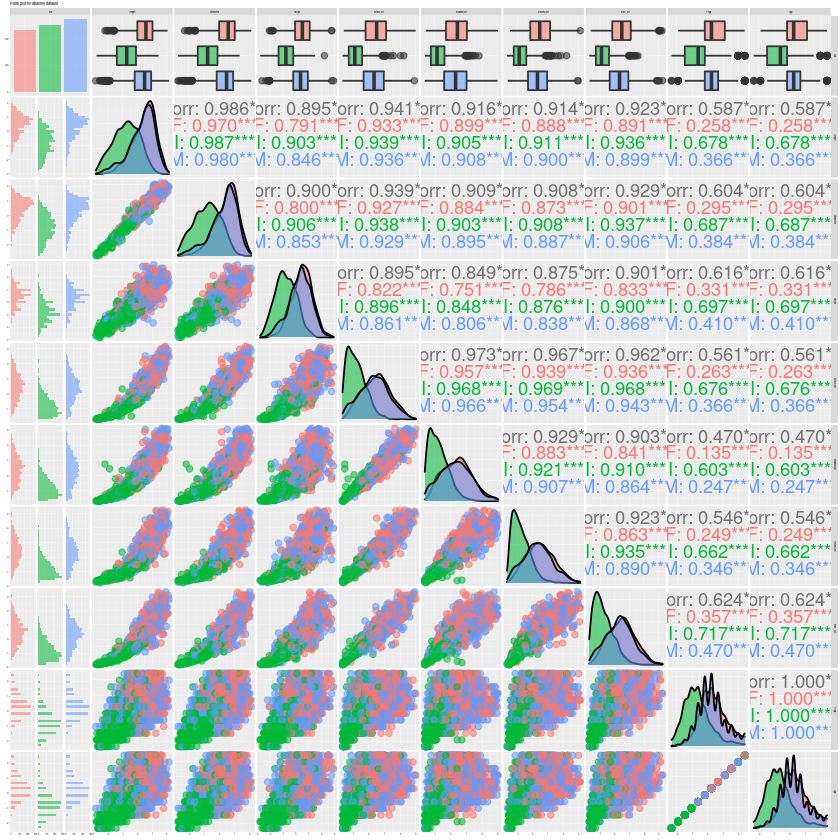

In [14]:

GGally::ggpairs(abl.cs, aes( color = sex ,alpha = 0.8 ), title = "Pairs plot for abalone dataset"  )+ ggplot2::theme_grey(base_size = 2) 

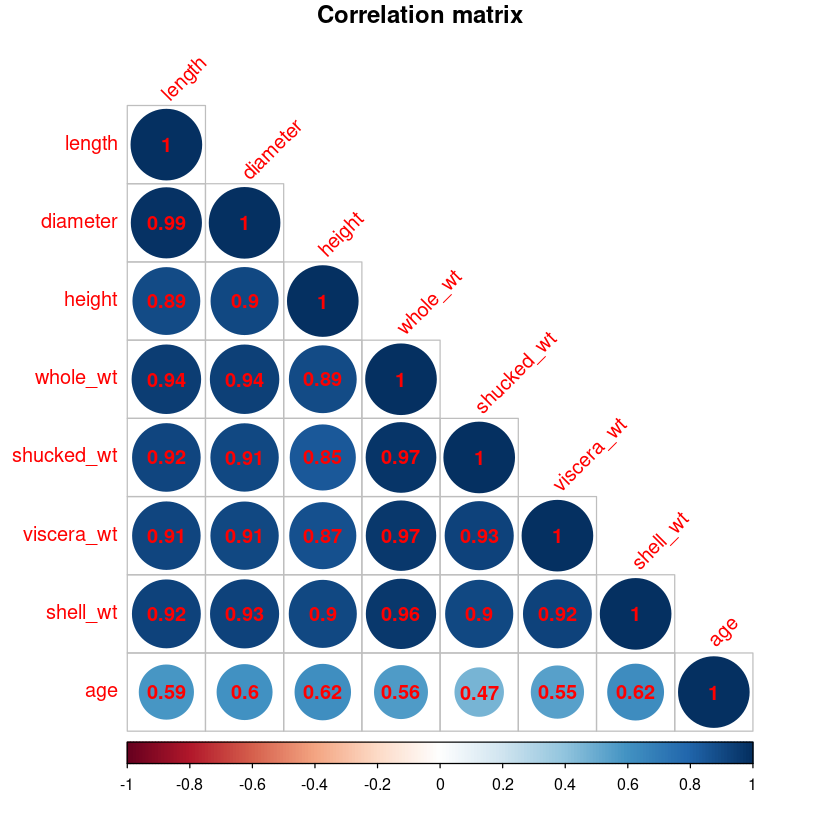

In [15]:
abalone_corr = abl.cs[,c(-1, -9)]

corrplot(cor(abalone_corr) ,type = "lower" ,main="\nCorrelation matrix" , addCoef.col = 'red', number.cex=1.0 , 
        , tl.srt = 45)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



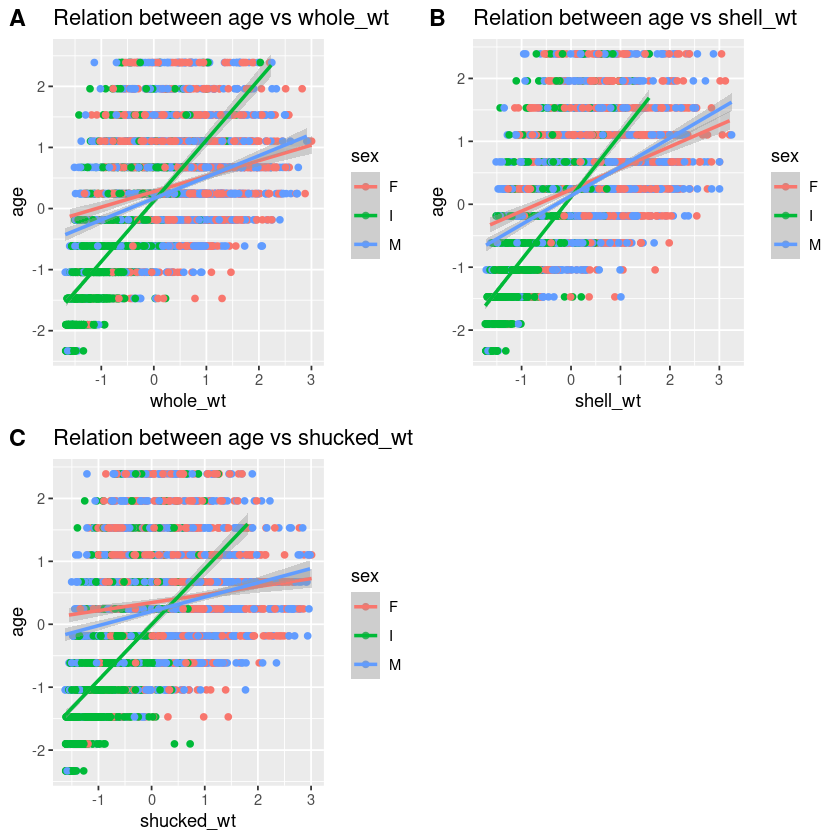

In [16]:
par(mfrow = c(2, 2 ))
age_wholewt = ggplot (abl.cs , aes(whole_wt , age , colour = sex))+
geom_point()+geom_smooth (method  = "lm")+
labs(title =  "Relation between age vs whole_wt") 

age_shuckedwt = ggplot (abl.cs , aes(shucked_wt , age , colour = sex))+
geom_point()+geom_smooth (method  = "lm")+
labs(title =  "Relation between age vs shucked_wt")

age_shellwt = ggplot (abl.cs , aes(shell_wt , age , colour = sex))+
geom_point()+geom_smooth (method  = "lm")+
labs(title =  "Relation between age vs shell_wt")

plot_grid(age_wholewt , age_shellwt , age_shuckedwt , labels ="AUTO" )




- Correlation between diameter and length is the highest.
- Ring count is highly correlated with height and shell_wt. Hence these 2 variable could be the best predictor in the model.

- First thing to note that there is hight correlation in data , There seems to be high multicollinearity between predictors .

- Secondly, the distributions of predictor Sex with factor level value of female and male are very similar with respect to all other predictors.

- The shape of distribution is also significantly similar for factor levels of female and male.
- ***The relationship between “Shell_wt” & “Age” and “Shucked_wt” & “Age” and “Whole_wt” & “Age” appears similar for males and females   but steeper for infants.***

- We can see that is nicely standarized and ready for exploration.




# 3.0 MODELLING.

## 3.1 Test and train data

'data.frame':	3781 obs. of  11 variables:
 $ sex       : Factor w/ 3 levels "F","I","M": 3 3 1 3 2 2 3 1 3 3 ...
 $ length    : num  -0.5922 -1.5338 0.0803 -0.7267 -1.7131 ...
 $ diameter  : num  -0.433 -1.517 0.163 -0.433 -1.626 ...
 $ height    : num  -1.1988 -1.3405 -0.0658 -0.3491 -1.6237 ...
 $ whole_wt  : num  -0.625 -1.274 -0.259 -0.621 -1.32 ...
 $ shucked_wt: num  -0.604 -1.219 -0.447 -0.649 -1.268 ...
 $ viscera_wt: num  -0.719 -1.237 -0.319 -0.591 -1.326 ...
 $ shell_wt  : num  -0.619 -1.271 -0.131 -0.579 -1.393 ...
 $ rings     : num  2.39 -1.043 -0.185 0.244 -1.043 ...
 $ age       : num  2.39 -1.043 -0.185 0.244 -1.043 ...
 $ split     : num  1 0 1 0 1 1 1 1 0 1 ...


Warning message:
“Ignoring unknown parameters: start”


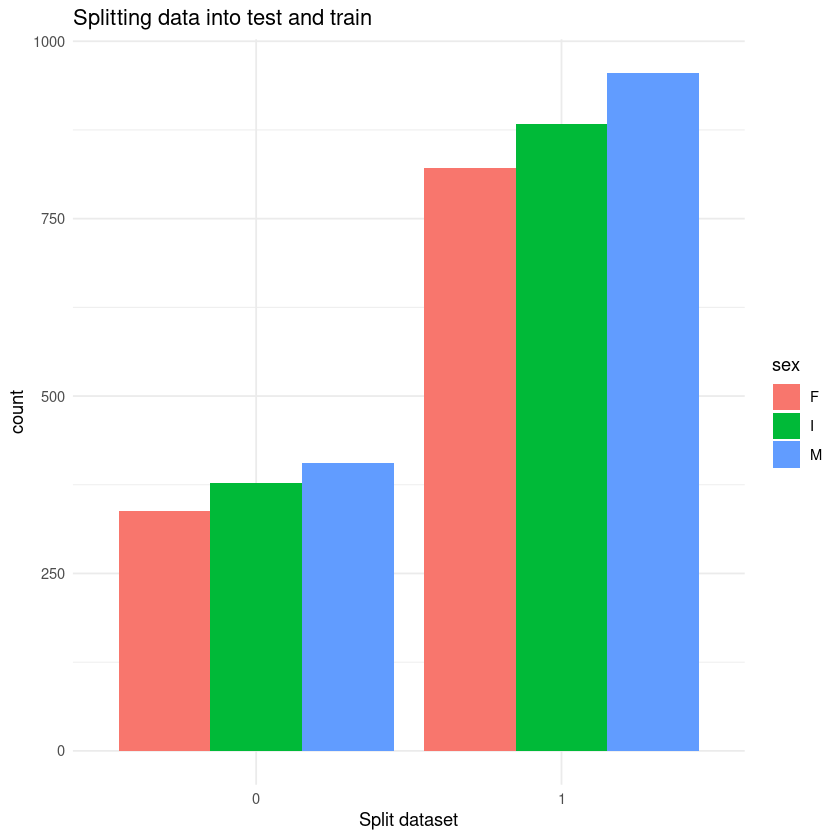

In [17]:
set.seed(90)
#Splitting data
abl.cs = abl.cs  %>%  
mutate (split = sample(c(0,1) , size = nrow(abl.cs) , replace =TRUE, prob = c(0.30 , 0.70 )))
str(abl.cs)
train  = subset(abl.cs , split== 1)
test = subset (abl.cs , split == 0)

ggplot(abl.cs , aes(as.factor(split) , fill= sex ))+
geom_bar(start = "identity" ,position = "dodge" )+

theme_minimal()+
ggtitle("Splitting data into test and train")+
xlab("Split dataset")

*It is a good practice to divide dataset into training and testing subsets. To randomly divide dataset I assigned 0s and 1s to the original dataset , as can be seen above data has been divided into 30:70 ratio with equal proportion between each factors.* 

## 3.2 MULTIPLE REGRESSION

### 3.2.1 OLS Estimation

In [18]:
# The OLS we are aiming for is :age of abalone which is determined by the count of rings hence we can say that age is dependent on the no of rings which is 1.5 * rings . Hence we can excluse the age variable for now in the model and consider as ring as explanatory variable i.e Regressing Rings~ sex + length + diameter + height +whole_wt+  vicera_wt + shucked_wt + shell_wt


ols1 = lm(rings ~ sex + length , data = train)
ols2 = lm(rings ~ sex +length + diameter, data = train)
ols3 = lm(rings ~ sex + length + diameter + height, data = train)
ols4 = lm(rings ~ sex + length + diameter +height + whole_wt, data = train)
ols5 = lm(rings ~ sex + length + diameter + height +whole_wt + shucked_wt, data = train)
ols6 = lm(rings ~ sex + length + diameter + height +whole_wt + shucked_wt, data = train)
ols7 = lm(rings ~ sex + length + diameter + height +whole_wt + shucked_wt + viscera_wt , data = train)
ols8 = lm(rings ~ sex + length + diameter + height +whole_wt + shucked_wt +viscera_wt + shell_wt, data = train)

export_summs(ols1 , ols2 , ols3 , ols4 , ols5 , ols6 , ols7 , ols8)



,names,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8
1,(Intercept),0.184560849154417 ***,0.162986945839229 ***,0.132277212099883 ***,0.135608347654814 ***,0.0922009565350247 ***,0.0922009565350247 ***,0.0959890396598155 ***,0.098929494155377 ***
2,,(0.0287061771415641),(0.0285490551375184),(0.0281353848059788),(0.0279681592993503),(0.0260862074743962),(0.0260862074743962),(0.0260348029639739),(0.0258715818442453)
3,sexI,-0.500127365133618 ***,-0.44764888617683 ***,-0.373856034357879 ***,-0.398590367915236 ***,-0.323307968992336 ***,-0.323307968992336 ***,-0.332483880133098 ***,-0.337718104892275 ***
4,,(0.0441743268440799),(0.0442591538641872),(0.0439487594551284),(0.0438841188222966),(0.0409612373657977),(0.0409612373657977),(0.0409197791790613),(0.0406653276874608)
5,sexM,-0.0495530343104082,-0.037379967559,-0.0217218938748293,-0.0146689320945983,0.0329017398059464,0.0329017398059464,0.0315076683701836,0.0296753623229806
6,,(0.0376221133887828),(0.0372641174057281),(0.0365547903853503),(0.0363500844359378),(0.0338716591316108),(0.0338716591316108),(0.0337832573304051),(0.0335667646111824)
7,length,0.470238478310689 ***,-0.206413756910432 *,-0.327543443654448 ***,-0.198410236373629 *,-0.0385313100278547,-0.0385313100278547,-0.00630620957913609,0.0164294187025677
8,,(0.0183411368588017),(0.091178696702061),(0.0901134659026138),(0.0922592853604935),(0.0861215106300464),(0.0861215106300464),(0.0862886858805894),(0.0858169023442396)


- With the addition of IV to the model we can see a gradual improvement of R^2 and reasonable p-values close to, or well below 0.05 critical value we can see, that all values except length are contributing to explanatory power of the model and are correctly included. 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in na.omit(as.numeric(R)):
“NAs introduced by coercion”


x1,y1
<chr>,<dbl>
Model 1,0.3791302
Model 2,0.3922522
Model 3,0.4163671
Model 4,0.4237422
Model 5,0.5021924
Model 6,0.5021924
Model 7,0.5050296
Model 8,0.5115783


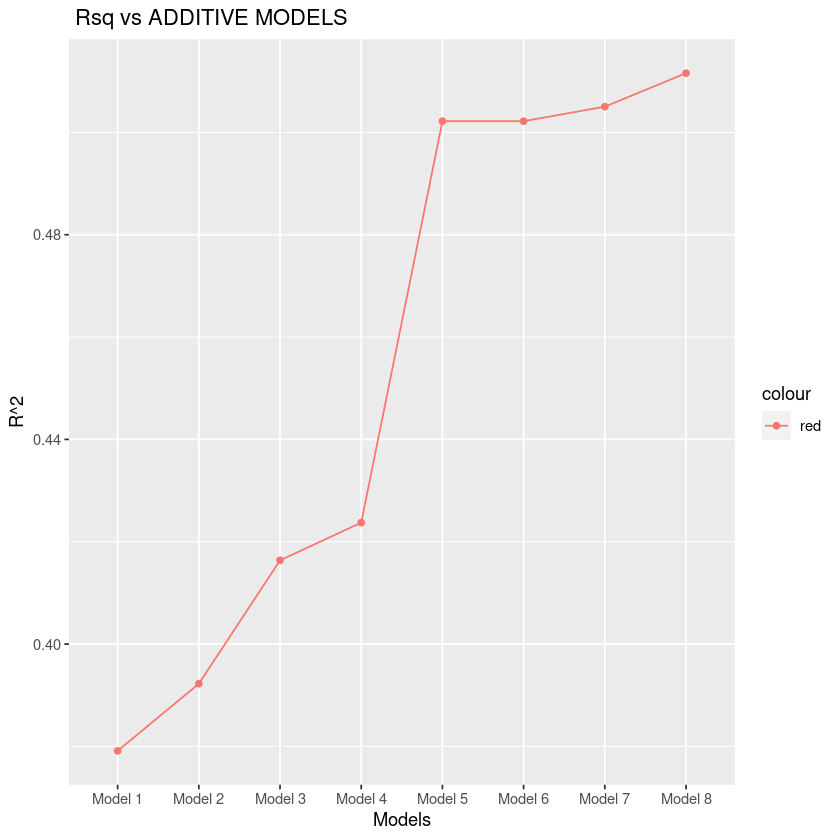

In [19]:
sum_model =export_summs(ols1 , ols2 , ols3 , ols4 , ols5 , ols6 , ols7 , ols8)

R =sum_model  %>% filter(names ==c("R2" ) )  
Rsq=as.numeric(R)
Rsq=na.omit(as.numeric(R))
sum_model_col=colnames(sum_model)
r2_vs_model=data.frame(x1=sum_model_col[-1] , y1 =Rsq)
r2_vs_model
#viz
ggplot(r2_vs_model , aes (x1 , y1, colour= "red" , group = 1))+geom_point() +geom_line() +labs(title =" Rsq vs ADDITIVE MODELS" ,x = "Models" , y= "R^2")

- As we see there is the drastic spike in R2 as the shucked_wt is added in the regression model . This is due to high correlation between whole_wt and shucked_wt.

In [20]:

## lets see a summary of selected model
summary(ols8)


Call:
lm(formula = rings ~ sex + length + diameter + height + whole_wt + 
    shucked_wt + viscera_wt + shell_wt, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.78920 -0.47274 -0.09323  0.36280  2.99538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.09893    0.02587   3.824 0.000134 ***
sexI        -0.33772    0.04067  -8.305  < 2e-16 ***
sexM         0.02968    0.03357   0.884 0.376739    
length       0.01643    0.08582   0.191 0.848190    
diameter     0.36022    0.08665   4.157 3.32e-05 ***
height       0.27265    0.03539   7.705 1.84e-14 ***
whole_wt     0.68289    0.13447   5.079 4.07e-07 ***
shucked_wt  -1.07726    0.07153 -15.060  < 2e-16 ***
viscera_wt  -0.12958    0.05450  -2.378 0.017494 *  
shell_wt     0.37409    0.06275   5.962 2.82e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7001 on 2651 degrees of freedom
Multiple R-squared:  0.5116,	Adjusted R-sq

*Model has the the RSE of .69 having adjusted R^2 .051 with all IV having .001 level of significance except length*

### 3.2.2 Multicolinearity
- As observed there are high correlation between the predictors , 
Hence the coefficients of expalanatory variable might not give the actual picture and can become sensitive to small changes in model

In [21]:
#VIF (variance of inflation) test
as.matrix(faraway::vif(ols8))

sexI,1.991842
sexM,1.407564
length,39.153577
diameter,39.936756
height,6.613850
whole_wt,95.417651
shucked_wt,26.854677
viscera_wt,15.718910
shell_wt,20.879258


- We looks at variable inflation factor for all variable and it appears that all predictors have value greater than 5 hence having multicolinearity issue except sex and height.
- Also whole weight has highest VIF .

In [22]:
#check for variablity in highly correlated variable .
ols_correlations(ols8)

,Zero-order,Partial,Part
,<dbl>,<dbl>,<dbl>
sexI,-0.4722241,-0.159238476,-0.112725631
sexM,0.2064372,0.017167920,0.011999942
length,0.5861266,0.003718275,0.002598615
diameter,0.6018336,0.080482599,0.056430071
height,0.6179514,0.147995053,0.104581196
whole_wt,0.5596599,0.098158687,0.068933225
shucked_wt,0.4665702,-0.280725579,-0.204410926
viscera_wt,0.5456913,-0.046129642,-0.032273059
shell_wt,0.6229894,0.115023860,0.080924038


- The partial correlation of whole_wt are close to .1, it means that the variation of Rings that is unexplained by predictors Sex,Length,Diameter,Height,Shucked_weight,Viscera_weight and Shell_weight shows very little correlation with the variation of Whole_weight that is not explained by Sex,Length,Diameter,Height,Shucked_weight,Viscera_weight and Shell_weight. Thus adding Whole_weight to the model would likely be of little benefit.

In [23]:
##model without whole_wt variable
ols8_model1 =lm(rings ~ sex + length + diameter + height + shucked_wt +viscera_wt + shell_wt, data = train)
summary(ols8_model1)

####Variance inflation factor of the additive model without the Whole_weight
as.matrix(faraway::vif(ols8_model1))


Call:
lm(formula = rings ~ sex + length + diameter + height + shucked_wt + 
    viscera_wt + shell_wt, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73098 -0.47329 -0.08827  0.36729  3.00320 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10440    0.02597   4.020 5.98e-05 ***
sexI        -0.35081    0.04077  -8.604  < 2e-16 ***
sexM         0.02578    0.03371   0.765    0.445    
length       0.02751    0.08619   0.319    0.750    
diameter     0.36192    0.08705   4.158 3.32e-05 ***
height       0.27593    0.03555   7.763 1.18e-14 ***
shucked_wt  -0.78225    0.04194 -18.652  < 2e-16 ***
viscera_wt   0.03362    0.04422   0.760    0.447    
shell_wt     0.59630    0.04518  13.198  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7033 on 2652 degrees of freedom
Multiple R-squared:  0.5068,	Adjusted R-squared:  0.5053 
F-statistic: 340.7 on 8 and 2652 DF,  p-value: <

sexI,1.983840
sexM,1.406829
length,39.128250
diameter,39.936157
height,6.611648
shucked_wt,9.145049
viscera_wt,10.253948
shell_wt,10.725643


- Still the VIF of the Diameter and Length is high.

In [24]:
ols_correlations(ols8_model1)

,Zero-order,Partial,Part
,<dbl>,<dbl>,<dbl>
sexI,-0.4722241,-0.164791037,-0.117330754
sexM,0.2064372,0.014846628,0.010427389
length,0.5861266,0.006198719,0.004353215
diameter,0.6018336,0.080473608,0.056697531
height,0.6179514,0.149052913,0.105856866
shucked_wt,0.4665702,-0.340547672,-0.254357728
viscera_wt,0.5456913,0.014759215,0.010365981
shell_wt,0.6229894,0.248258914,0.179977504


The partial correlation of diameter are close to zero, it means that the variation of Rings that is unexplained by predictors Sex,Length,Diameter,Height,Shucked_weight,Viscera_weight and Shell_weight shows very little correlation with the variation of Whole_weight that is not explained by Sex,Length,Diameter,Height,Shucked_weight,Viscera_weight and Shell_weight. Thus adding Whole_weight to the model would likely be of little benefit.

In [25]:
##model without whoe_wt and diameter variable
ols8_model2 =lm(rings ~ sex + length +height + shucked_wt +viscera_wt + shell_wt, data = train)

####Variance inflation factor of the additive model without the Whole_weight and diameter
as.matrix(faraway::vif(ols8_model2))

sexI,1.961260
sexM,1.405048
length,10.215753
height,6.530751
shucked_wt,9.137632
viscera_wt,10.212159
shell_wt,10.252933


In [26]:
summary(ols8_model2)


Call:
lm(formula = rings ~ sex + length + height + shucked_wt + viscera_wt + 
    shell_wt, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7335 -0.4753 -0.1042  0.3650  3.0309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11230    0.02598   4.323 1.60e-05 ***
sexI        -0.36889    0.04066  -9.072  < 2e-16 ***
sexM         0.02079    0.03380   0.615    0.538    
length       0.33555    0.04417   7.596 4.21e-14 ***
height       0.29228    0.03544   8.248 2.51e-16 ***
shucked_wt  -0.77729    0.04205 -18.485  < 2e-16 ***
viscera_wt   0.02188    0.04427   0.494    0.621    
shell_wt     0.63574    0.04431  14.347  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7055 on 2653 degrees of freedom
Multiple R-squared:  0.5036,	Adjusted R-squared:  0.5023 
F-statistic: 384.5 on 7 and 2653 DF,  p-value: < 2.2e-16


- We can see thet VIF is much lower.

### 3.2.3 Anova Ftest

In [27]:
anova(ols8_model2 , ols8)
summary (ols8_model2)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2653,1320.458,NA,NA,NA,NA
2,2651,1299.266,2,21.19168,21.61956,4.858396e-10



Call:
lm(formula = rings ~ sex + length + height + shucked_wt + viscera_wt + 
    shell_wt, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7335 -0.4753 -0.1042  0.3650  3.0309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11230    0.02598   4.323 1.60e-05 ***
sexI        -0.36889    0.04066  -9.072  < 2e-16 ***
sexM         0.02079    0.03380   0.615    0.538    
length       0.33555    0.04417   7.596 4.21e-14 ***
height       0.29228    0.03544   8.248 2.51e-16 ***
shucked_wt  -0.77729    0.04205 -18.485  < 2e-16 ***
viscera_wt   0.02188    0.04427   0.494    0.621    
shell_wt     0.63574    0.04431  14.347  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7055 on 2653 degrees of freedom
Multiple R-squared:  0.5036,	Adjusted R-squared:  0.5023 
F-statistic: 384.5 on 7 and 2653 DF,  p-value: < 2.2e-16


- Anova test confirms that adressing multicolineaity isuue results better model , Hence we can reject the null.

In [28]:
##After removing significant multicoliniearity we can vicera_wt becomes insignificant and hence can be removed

ols8_model3 =lm(rings ~ sex + length +height + shucked_wt + shell_wt, data = train)
summary(ols8_model3)


Call:
lm(formula = rings ~ sex + length + height + shucked_wt + shell_wt, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7481 -0.4729 -0.1040  0.3689  3.0339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11314    0.02592   4.365 1.32e-05 ***
sexI        -0.37097    0.04044  -9.173  < 2e-16 ***
sexM         0.02038    0.03378   0.603    0.546    
length       0.33836    0.04380   7.725 1.58e-14 ***
height       0.29458    0.03512   8.387  < 2e-16 ***
shucked_wt  -0.76771    0.03731 -20.576  < 2e-16 ***
shell_wt     0.64207    0.04241  15.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7054 on 2654 degrees of freedom
Multiple R-squared:  0.5036,	Adjusted R-squared:  0.5024 
F-statistic: 448.7 on 6 and 2654 DF,  p-value: < 2.2e-16


### 3.2.4 Diagnistic plots

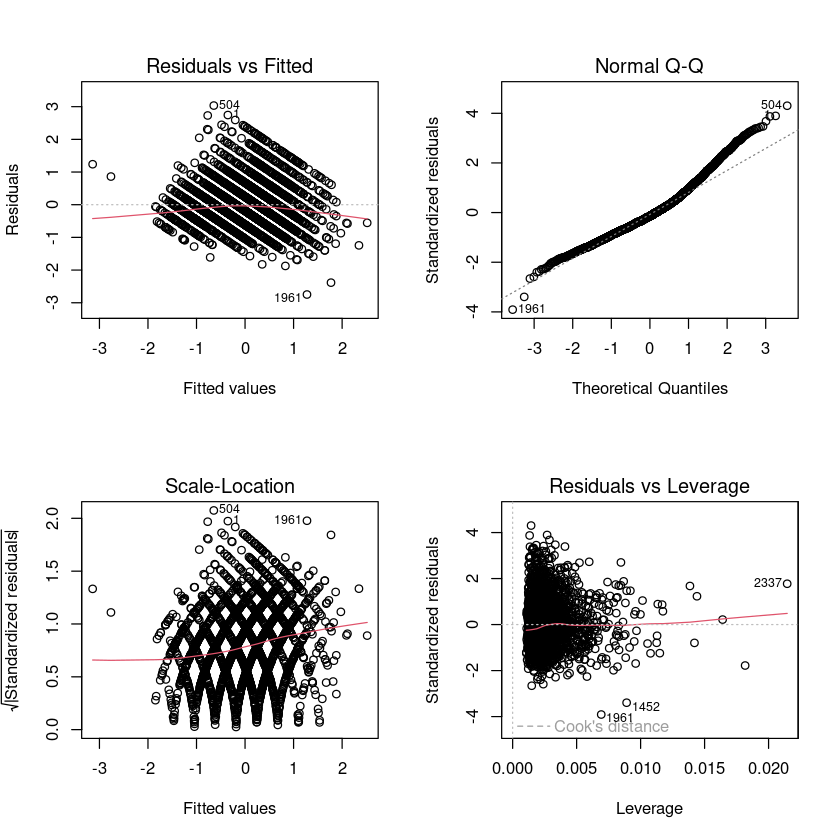

In [29]:
par(mfrow = c(2,2))
plot(ols8_model3)

### 3.2.5 Statistical test

In [30]:
library(lmtest)
lmtest::dwtest(ols8_model3)
             

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  ols8_model3
DW = 1.4215, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


- *As the DW value is 1.91 which lies in the range of 1.5 to 2.5 hence there is no autocorrelation between the residuals* 

### 3.2.6 Check for Influencers

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

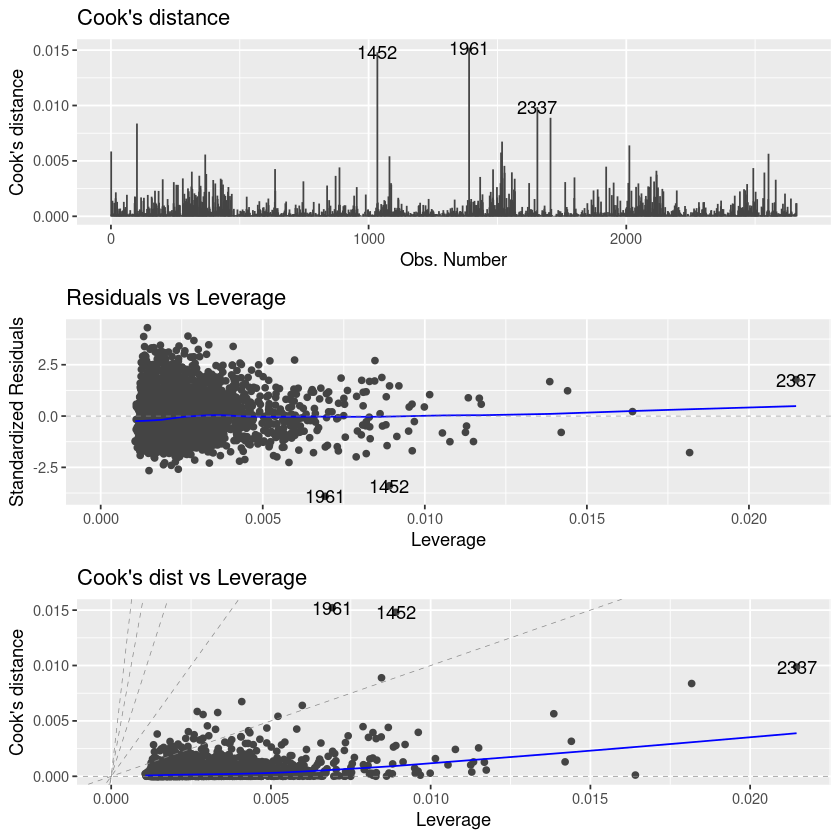

In [31]:
## Detecting leverages and influencers
autoplot(ols8_model3, which =4:6,  nrow =3,  ncol =1
)
names(summary(ols8_model3))

- There are potential influencers which might effect the model prediction.

In [32]:
ols8_model3 %>%
   augment() %>% 
   dplyr::select(rings , .hat , .cooksd) %>% 
   arrange(desc(.cooksd))  %>% 
   head()

## removing the most influencial data

train_1= train  %>% 
filter( rings != c(-0.6139 ,-1.4721 , 1.1025 )) 


ols8_model4 =lm(rings ~ sex + length +height + shucked_wt + shell_wt, data = train_1)
summary(ols8_model4)




rings,.hat,.cooksd
<dbl>,<dbl>,<dbl>
-1.4720702,0.006922499,0.015219473
-0.6138638,0.008906451,0.014805829
-1.9011734,0.021454570,0.009868424
1.5316521,0.008461724,0.008894797
1.1025489,0.018169328,0.008374332
2.3898584,0.004087079,0.006744601



Call:
lm(formula = rings ~ sex + length + height + shucked_wt + shell_wt, 
    data = train_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7481 -0.4729 -0.1040  0.3689  3.0339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11314    0.02592   4.365 1.32e-05 ***
sexI        -0.37097    0.04044  -9.173  < 2e-16 ***
sexM         0.02038    0.03378   0.603    0.546    
length       0.33836    0.04380   7.725 1.58e-14 ***
height       0.29458    0.03512   8.387  < 2e-16 ***
shucked_wt  -0.76771    0.03731 -20.576  < 2e-16 ***
shell_wt     0.64207    0.04241  15.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7054 on 2654 degrees of freedom
Multiple R-squared:  0.5036,	Adjusted R-squared:  0.5024 
F-statistic: 448.7 on 6 and 2654 DF,  p-value: < 2.2e-16


- ***As seen from the summary of ols8_model4 the height variable has the lowest std error .Hence we can say height is the better predictor than other.***

## 4.0 Prediction age of abalone.

In [33]:

## Drop the variables from the test dataset as per the train model.
test_1 = test %>% dplyr::select(sex ,length ,height , shucked_wt , shell_wt, rings)
train_1 = train %>%  dplyr:: select(sex ,length ,height , shucked_wt , shell_wt, rings)
set.seed(900)
## Take random observation fro test data
test_5 =sample_n(test_1 , 10)


## predicting avalone rings
no.rings_pred. =  predict(ols8_model4 , test_5 , interval = "prediction")
no.rings_obs. = abl.cs$rings

## Destandarization of ring variable
targetmean = mean(abl_num_noout$rings)
targetsd = sd(abl_num_noout$rings)
unscaledtest.obs = round(no.rings_obs. *targetsd + targetmean , 0)
unscaledtest.pred = round (no.rings_pred. *targetsd + targetmean , 0)
obs.age = unscaledtest.obs * 1.5
pred.age = unscaledtest.pred * 1.5


cbind(observed_no.rings = unscaledtest.obs ,predicted =unscaledtest.pred ,observed_age = obs.age , pred.age ) %>%  head(10)

#exp(predict(ols8_model3, newdata=new_data, interval="confidence"))

rmse_trainols8_model=sqrt(mean((train$rings  - predict(ols8 , train))^2))
rmse_testols8_model = sqrt(mean((test$rings  - predict(ols8 , test))^2))


rmse_trainols8_model4=sqrt(mean((train_1$rings  - predict(ols8_model4 , train_1))^2))
rmse_testols8_model4 = sqrt(mean((test_1$rings  - predict(ols8_model4 , test_1))^2))


data.frame(model =c("ols8","ols8_model4") ,rmse_train = c(rmse_trainols8_model ,rmse_trainols8_model4) , rmse_test =c(rmse_testols8_model ,rmse_trainols8_model4 ))

Warning message in cbind(observed_no.rings = unscaledtest.obs, predicted = unscaledtest.pred, :
“number of rows of result is not a multiple of vector length (arg 1)”


,observed_no.rings,fit,lwr,upr,observed_age,fit,lwr,upr
1,15,10,7,13,22.5,15.0,10.5,19.5
2,7,10,6,13,10.5,15.0,9.0,19.5
3,9,11,8,14,13.5,16.5,12.0,21.0
4,10,9,5,12,15.0,13.5,7.5,18.0
5,7,12,8,15,10.5,18.0,12.0,22.5
6,8,8,4,11,12.0,12.0,6.0,16.5
7,9,9,6,13,13.5,13.5,9.0,19.5
8,14,12,8,15,21.0,18.0,12.0,22.5
9,10,10,7,13,15.0,15.0,10.5,19.5
10,11,8,4,11,16.5,12.0,6.0,16.5


model,rmse_train,rmse_test
<chr>,<dbl>,<dbl>
ols8,0.6987578,0.7068863
ols8_model4,0.7044657,0.7044657


- We see that the "ols8" fits the train data well with much lower rmse while the "ols8_model4" fits the test data better .This means that "ols8" overfits the data and we prefer "ols8_model4" .When choosing a model for prediction, we prefer a model that predicts unseen data. well

# SUMMARY

- The task to predict the age of abalone is approached usind the Multiple Regression model . First the dataset was exploted, unusual observation were recorded which were removed and the variables were appropriatly standarized.

- Based on the correlation matrix we observed their was high multicollinearity between the variables and this need to be taken care in model to have unbiased and consistent result .

- We started with an additive model **ols8** and continued with checking the VIF and partial correlation  to further improve the accuracy.

- After statistical anova test  we found that **ols8_mode4** turns out be the better fit than the additive model. This was futher supported by improved rmse in test dataset.

- As per the descriptive analysis we found that the relationship between “Shell_wt” & “Age” and “Shucked_wt” & “Age” and “Whole_wt” & “Age” appears similar for males and females but steeper for infants 

- Correlation plot gave the idea the height and shell_wt could be the better predictor which was confirmed in **ols8_model4** as height being best predictor with the lowest standard error.

- We took 10 sample observations from test data and predicted the age using our selected model (ols8_model4) and on average it correctly predicted the age 3 out of 10 times. From the test rmse value of selected model (0.7045) , We think that our model is fitting really well for predicting the age of Abalone



